In [1]:
import numpy as np
import h5py
import pickle
import sys
import os
import matplotlib.pyplot as plt

current_dir = os.path.abspath(os.getcwd())
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)

import src.models as models 

In [2]:

with h5py.File("scaling_regressorV3.h5", "r") as f:
    
    seed_vec_base = f['results/seed'][:]
    hidden_vec_base = f['results/hidden'][:]
    loss_net_vec_base = f['results/loss_net'][:]
    loss_proj_vec_base = f['results/loss_proj'][:]
    pickled_config_base = f['results/config'][()]

config = pickle.loads(pickled_config_base)


unique_hidden_base = np.unique(hidden_vec_base)
loss_net_base_dict = {ele: [] for ele in unique_hidden_base}
loss_proj_base_dict = {ele: [] for ele in unique_hidden_base}

for i in range(len(seed_vec_base)):
    
    loss_net_base_dict[hidden_vec_base[i]].append(loss_net_vec_base[i])
    loss_proj_base_dict[hidden_vec_base[i]].append(loss_proj_vec_base[i])


rmse_net_base_dict = {}
for i, (size, vec) in enumerate(loss_net_base_dict.items()):
    vec_sqrt = np.sqrt(vec)
    rmse_net_base_dict[size] = (np.mean(vec_sqrt), np.std(vec_sqrt))

rmse_proj_base_dict = {}
for i, (size, vec) in enumerate(loss_proj_base_dict.items()):
    vec_sqrt = np.sqrt(vec)
    rmse_proj_base_dict[size] = (np.mean(vec_sqrt), np.std(vec_sqrt))
    

In [3]:
with h5py.File("scaling_pcdaeV2.h5", "r") as f:
    
    seed_vec_pcdae = f['results/seed'][:]
    hidden_vec_pcdae = f['results/hidden'][:]
    loss_init_pcdae = f['results/loss_init'][:]
    loss_refine1_pcdae = f['results/loss_refine1'][:]
    loss_refine2_pcdae = f['results/loss_refine2'][:]
    pickled_config = f['results/config'][()]

config_pcdae = pickle.loads(pickled_config)


unique_hidden_pcdae = np.unique(hidden_vec_pcdae)
loss1_pcdae_dict = {ele: [] for ele in unique_hidden_pcdae}
loss2_pcdae_dict = {ele: [] for ele in unique_hidden_pcdae}


for i in range(len(seed_vec_pcdae)):
    loss1_pcdae_dict[hidden_vec_pcdae[i]].append(loss_refine1_pcdae[i])
    loss2_pcdae_dict[hidden_vec_pcdae[i]].append(loss_refine2_pcdae[i])


rmse1_pcdae_dict = {}
for i, (size, vec) in enumerate(loss1_pcdae_dict.items()):
    vec_sqrt = np.sqrt(vec)
    rmse1_pcdae_dict[size] = (np.mean(vec_sqrt), np.std(vec_sqrt))

rmse2_pcdae_dict = {}
for i, (size, vec) in enumerate(loss2_pcdae_dict.items()):
    vec_sqrt = np.sqrt(vec)
    rmse2_pcdae_dict[size] = (np.mean(vec_sqrt), np.std(vec_sqrt))
    


In [4]:
### parameters count regressor

input_size = 3
output_size = 17

parameters_base = []
rmse_net_mean_base = []
rmse_net_std_base = []
rmse_proj_mean_base = []
rmse_proj_std_base = []

for size in unique_hidden_base:
    hidden_sizes = [size, size]
    model_loaded = models.Regressor(input_size=input_size, output_size=output_size, hidden_sizes=hidden_sizes)
    params = models.count_parameters(model_loaded)
    
    parameters_base.append(params)
    mean, std = rmse_net_base_dict[size]
    rmse_net_mean_base.append(mean)
    rmse_net_std_base.append(std)
    
    mean, std = rmse_proj_base_dict[size]
    rmse_proj_mean_base.append(mean)
    rmse_proj_std_base.append(std)

rmse_net_mean_base = np.array(rmse_net_mean_base)
rmse_net_std_base = np.array(rmse_net_std_base)

rmse_proj_mean_base = np.array(rmse_proj_mean_base)
rmse_proj_std_base = np.array(rmse_proj_std_base)

input_size = 3
output_size = 17

parameters_pcdae = []
rmse1_mean_pcdae = []
rmse1_std_pcdae = []
rmse2_mean_pcdae = []
rmse2_std_pcdae = []


for size in unique_hidden_pcdae:
    hidden_dim = size
    model_loaded = models.PCDAE(x_dim=input_size, y_dim=output_size, hidden_dim=size)
    params = models.count_parameters(model_loaded)
    
    parameters_pcdae.append(params)
    mean, std = rmse1_pcdae_dict[size]
    rmse1_mean_pcdae.append(mean)
    rmse1_std_pcdae.append(std)
    
    mean, std = rmse2_pcdae_dict[size]
    rmse2_mean_pcdae.append(mean)
    rmse2_std_pcdae.append(std)


rmse1_mean_pcdae = np.array(rmse1_mean_pcdae)
rmse2_mean_pcdae = np.array(rmse2_mean_pcdae)

rmse1_std_pcdae = np.array(rmse1_std_pcdae)
rmse2_std_pcdae = np.array(rmse2_std_pcdae)


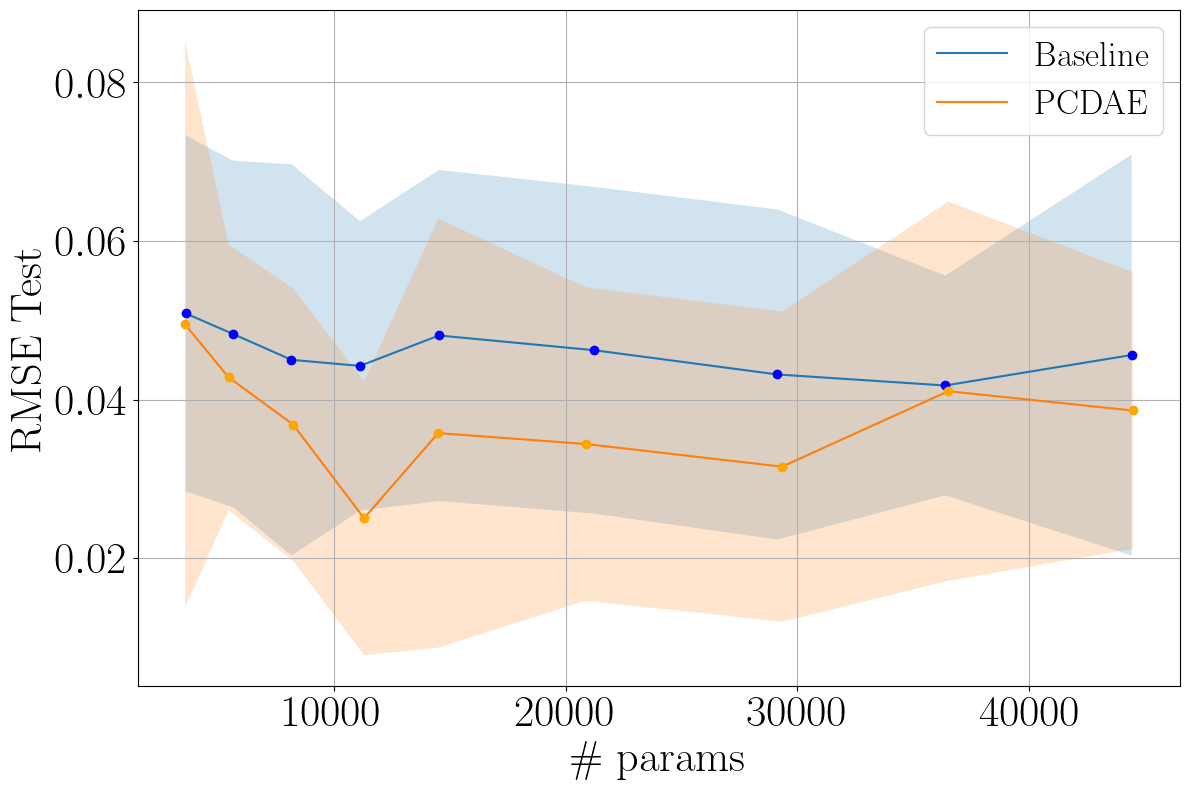

In [8]:

fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'



plt.plot(parameters_base, rmse_proj_mean_base, label="Baseline")
plt.plot(parameters_base, rmse_proj_mean_base, 'o', color="blue")
plt.fill_between(parameters_base,
                    rmse_proj_mean_base - rmse_proj_std_base,
                    rmse_proj_mean_base + rmse_proj_std_base,
                    alpha=0.2)


plt.plot(parameters_pcdae, rmse1_mean_pcdae, label="PCDAE")
plt.plot(parameters_pcdae, rmse1_mean_pcdae, 'o', color="orange")
plt.fill_between(parameters_pcdae,
                    rmse1_mean_pcdae - rmse1_std_pcdae,
                    rmse1_mean_pcdae + rmse1_std_pcdae,
                    alpha=0.2)

# plt.plot(parameters_pcdae, rmse2_mean_pcdae, label="PCDAE")
# plt.plot(parameters_pcdae, rmse2_mean_pcdae, 'o', color="orange")
# plt.fill_between(parameters_pcdae,
#                     rmse2_mean_pcdae - rmse2_std_pcdae,
#                     rmse2_mean_pcdae + rmse2_std_pcdae,
#                     alpha=0.2)


plt.xlabel(r'$\#$ params', fontsize=32)
plt.ylabel(r'RMSE Test', fontsize=32)
# plt.ylabel(r'$T/\Lambda$', fontsize=32)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
plt.legend(fontsize=25)
# plt.ylim(0.005, 0.09)
plt.tight_layout()
plt.grid()
plt.savefig("PCDAE_Baseline_params_scaling.png")

In [6]:
print(np.abs((rmse1_mean_pcdae - rmse_proj_mean_base)/rmse_proj_mean_base)*100)

[ 2.7045403  11.28471431 18.14911845 43.42879271 25.61840491 25.60019286
 26.94721206  1.72489183 15.35185159]


In [7]:
### less params to see 
### more iteatiosn in the baseline